In [207]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
data = pd.read_csv('bird.csv', index_col=0, delimiter=',')
data

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
id,,,,,,,,,,,
0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW
...,...,...,...,...,...,...,...,...,...,...,...
415,17.96,1.63,19.25,1.33,18.36,1.54,31.25,1.33,21.99,1.15,SO
416,19.21,1.64,20.76,1.49,19.24,1.45,33.21,1.28,23.60,1.15,SO
417,18.79,1.63,19.83,1.53,20.96,1.43,34.45,1.41,22.86,1.21,SO


<AxesSubplot: xlabel='huml', ylabel='humw'>

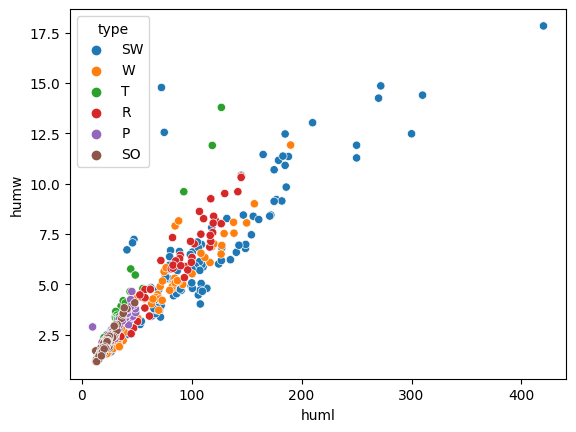

In [208]:
data=data.dropna()
sns.scatterplot(data=data, x='huml', y='humw', hue='type')

In [209]:

data['type'].value_counts

<bound method IndexOpsMixin.value_counts of id
0      SW
1      SW
2      SW
3      SW
4      SW
       ..
415    SO
416    SO
417    SO
418    SO
419    SO
Name: type, Length: 413, dtype: object>

In [210]:
X = data.drop(['type'], axis=1)
Y = data['type']
pd.DataFrame(Y)
X, Y

(      huml  humw  ulnal  ulnaw   feml  femw   tibl  tibw   tarl  tarw
 id                                                                   
 0    80.78  6.68  72.01   4.88  41.81  3.70   5.50  4.03  38.70  3.84
 1    88.91  6.63  80.53   5.59  47.04  4.30  80.22  4.51  41.50  4.01
 2    79.97  6.37  69.26   5.28  43.07  3.90  75.35  4.04  38.31  3.34
 3    77.65  5.70  65.76   4.77  40.04  3.52  69.17  3.40  35.78  3.41
 4    62.80  4.84  52.09   3.73  33.95  2.72  56.27  2.96  31.88  3.13
 ..     ...   ...    ...    ...    ...   ...    ...   ...    ...   ...
 415  17.96  1.63  19.25   1.33  18.36  1.54  31.25  1.33  21.99  1.15
 416  19.21  1.64  20.76   1.49  19.24  1.45  33.21  1.28  23.60  1.15
 417  18.79  1.63  19.83   1.53  20.96  1.43  34.45  1.41  22.86  1.21
 418  20.38  1.78  22.53   1.50  21.35  1.48  36.09  1.53  25.98  1.24
 419  17.89  1.44  19.26   1.10  17.62  1.34  29.81  1.24  21.69  1.05
 
 [413 rows x 10 columns],
 id
 0      SW
 1      SW
 2      SW
 3      SW
 

In [211]:
LO = Y.unique()

In [212]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.33, random_state=0)
len(xTrain), len(xTest), len(yTrain), len(yTest)

(276, 137, 276, 137)

In [213]:
result = pd.DataFrame({ 'train' : yTrain.value_counts(), 'test': yTest.value_counts(), '%train' : yTrain.value_counts()/Y.value_counts(), '%test' : yTest.value_counts()/Y.value_counts() })
result

,train,test,%train,%test
P,25,13,0.657895,0.342105
R,32,16,0.666667,0.333333
SO,84,40,0.677419,0.322581
SW,75,41,0.646552,0.353448
T,16,7,0.695652,0.304348
W,44,20,0.687500,0.312500


In [214]:
knn = KNeighborsClassifier()
knn.fit(xTrain, yTrain)
yPredKnn = knn.predict(xTest)
knn.score(xTest, yTest)

0.7226277372262774

In [215]:
conf = confusion_matrix(yTest, yPredKnn, labels=LO)
conf

array([[29,  6,  1,  1,  2,  2],
       [ 6,  7,  0,  3,  2,  2],
       [ 0,  0,  5,  0,  2,  0],
       [ 3,  0,  0, 11,  2,  0],
       [ 0,  0,  1,  1,  8,  3],
       [ 0,  0,  0,  0,  1, 39]], dtype=int64)

<AxesSubplot: >

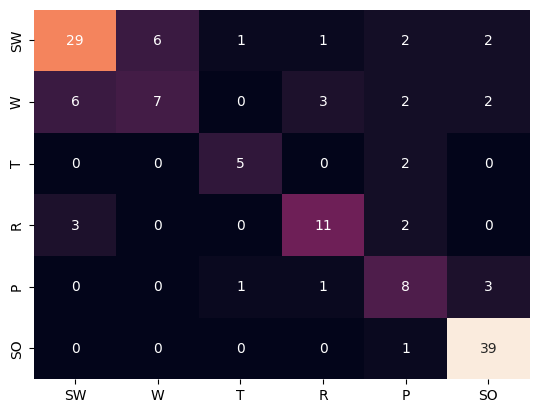

In [216]:
sns.heatmap(conf, annot= True, cbar=False, xticklabels=LO, yticklabels=LO )

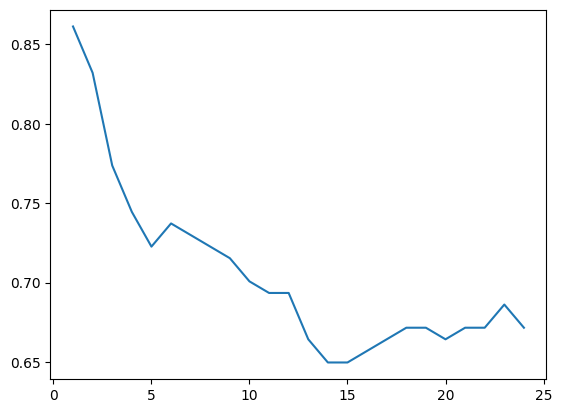

In [217]:
import matplotlib.pyplot as plt
score=[]
for n in range(1,25):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(xTrain, yTrain)
    score.append(knn.score(xTest, yTest))
plt.plot(range(1,25), score)

In [218]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(xTrain, yTrain)
yPredKnn = knn.predict(xTest)
knn.score(xTest, yTest)

0.8613138686131386

<AxesSubplot: >

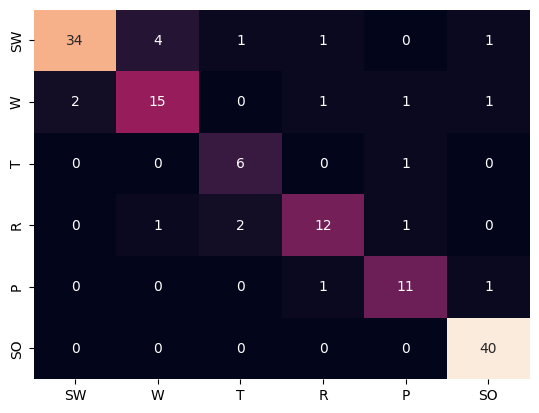

In [219]:
conf = confusion_matrix(yTest, yPredKnn, labels=LO)
sns.heatmap(conf, annot= True, cbar=False, xticklabels=LO, yticklabels=LO )

In [220]:
svc = SVC()
svc.fit(xTrain, yTrain)
yPredSVC = svc.predict(xTest)
svc.score(xTest, yTest)


0.6277372262773723

In [221]:
conf = confusion_matrix(yTest, yPredSVC, labels=LO)
conf

array([[36,  0,  0,  0,  0,  5],
       [11,  0,  0,  3,  0,  6],
       [ 0,  0,  0,  0,  0,  7],
       [ 4,  0,  0, 10,  1,  1],
       [ 1,  0,  0,  0,  0, 12],
       [ 0,  0,  0,  0,  0, 40]], dtype=int64)

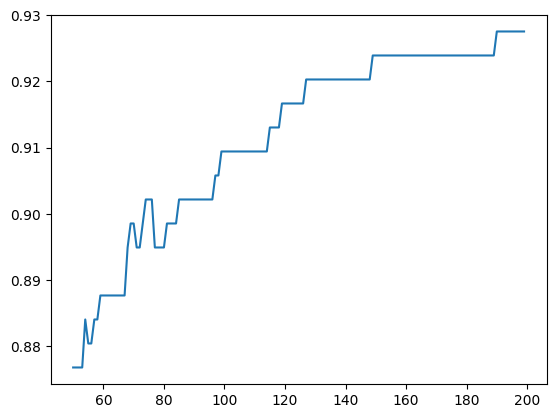

In [222]:
score=[]
for n in range(50,200):
    svc = SVC(C=n)
    svc.fit(xTrain, yTrain)
    score.append(svc.score(xTrain, yTrain))
plt.plot(range(50,200), score)

<AxesSubplot: >

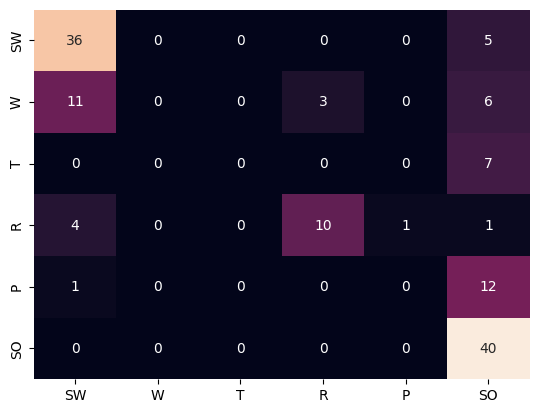

In [223]:
sns.heatmap(conf, annot= True, cbar=False, xticklabels=LO, yticklabels=LO )